In [1]:
import pandas as pd
import xlwings as xw

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline


rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:

path = r'/Users/parkjunhyeok/Desktop/부동산데이터분석/행정구역_시도_별_1인당_지역내총생산__지역총소득__개인소득_20190310191045.xlsx'
raw = pd.read_excel(path, sheet_name='데이터', index_col=0)

raw

/opt/homebrew/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017 p)
행정구역(시도)별,,,,,,,,,,,,,,,,,,
행정구역(시도)별,1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원)
전국,8602,8964,9419,9848,10493,11198,11656,12407,12883,13173,14068,14706,15256,15799,16394,17222,17653,18448
서울특별시,10119,10616,11185,11787,12493,13453,13955,15130,15401,15405,16495,17215,18018,18565,19104,19962,20506,21429
부산광역시,8231,8539,9024,9364,9835,10581,11077,11825,12469,12791,13672,14694,15430,15972,16369,17170,17599,18332
대구광역시,8253,8481,8886,9261,9711,10482,10925,11562,12017,12315,13376,14183,14635,15047,15851,16686,16987,17568
인천광역시,7761,7979,8409,8766,9378,10021,10489,11074,11625,12056,13022,13513,14167,14714,15549,16299,16974,17550
광주광역시,7985,8426,8686,9175,9657,10499,10997,11665,12180,13107,13464,13927,14528,14849,15341,16105,16575,17343
대전광역시,8047,8461,8864,9391,9912,10697,11313,11963,12439,13229,14205,14801,15280,15721,16207,17064,17680,18454
울산광역시,9714,10394,10952,11517,12667,13555,13931,15380,16046,16260,17329,18507,18694,19011,19238,19963,19496,19912


In [3]:
raw.drop(['행정구역(시도)별'],inplace=True)

In [4]:
raw.head()


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017 p)
행정구역(시도)별,,,,,,,,,,,,,,,,,,
전국,8602,8964,9419,9848,10493,11198,11656,12407,12883,13173,14068,14706,15256,15799,16394,17222,17653,18448
서울특별시,10119,10616,11185,11787,12493,13453,13955,15130,15401,15405,16495,17215,18018,18565,19104,19962,20506,21429
부산광역시,8231,8539,9024,9364,9835,10581,11077,11825,12469,12791,13672,14694,15430,15972,16369,17170,17599,18332
대구광역시,8253,8481,8886,9261,9711,10482,10925,11562,12017,12315,13376,14183,14635,15047,15851,16686,16987,17568
인천광역시,7761,7979,8409,8766,9378,10021,10489,11074,11625,12056,13022,13513,14167,14714,15549,16299,16974,17550


In [5]:
index_list = raw.index
new_index = []
for temp in index_list:
    if temp[-1] == '시':
        new_index.append(temp[:2])
    elif temp[-1] == '도':
        if len(temp) == 3:
            new_index.append(temp[:2])
        elif len(temp) == 4:
            new_index.append(temp[0] + temp[2])
        else:
            new_index.append('제주')
    else:
        new_index.append(temp)
        
raw.index = new_index

In [6]:
raw.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017 p)
전국,8602,8964,9419,9848,10493,11198,11656,12407,12883,13173,14068,14706,15256,15799,16394,17222,17653,18448
서울,10119,10616,11185,11787,12493,13453,13955,15130,15401,15405,16495,17215,18018,18565,19104,19962,20506,21429
부산,8231,8539,9024,9364,9835,10581,11077,11825,12469,12791,13672,14694,15430,15972,16369,17170,17599,18332
대구,8253,8481,8886,9261,9711,10482,10925,11562,12017,12315,13376,14183,14635,15047,15851,16686,16987,17568
인천,7761,7979,8409,8766,9378,10021,10489,11074,11625,12056,13022,13513,14167,14714,15549,16299,16974,17550


In [7]:
income_data = raw.T

income_data.head()

,전국,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주
2000,8602,10119,8231,8253,7761,7985,8047,9714,8865,7485,7834,8092,7611,7148,7938,7855,8512
2001,8964,10616,8539,8481,7979,8426,8461,10394,9126,7833,8093,8280,8086,7579,8165,8412,8477
2002,9419,11185,9024,8886,8409,8686,8864,10952,9672,8294,8538,8610,8195,7768,8647,8697,9084
2003,9848,11787,9364,9261,8766,9175,9391,11517,9952,8676,9006,9047,8668,8317,8898,9156,9395
2004,10493,12493,9835,9711,9378,9657,9912,12667,10554,9284,9621,9966,9289,9017,9687,9828,9689


In [8]:
# 함수화
def income_preprocessing(path):
    # path : KB 데이터 엑셀 파일의 디렉토리 (문자열)
    
    raw = pd.read_excel(path)
    raw.drop([0], inplace=True)
    raw.set_index('행정구역(시도)별', inplace=True)
    index_list = raw.index
    new_index = []
    for temp in index_list:
        if temp[-1] == '시':
            new_index.append(temp[:2])
        elif temp[-1] == '도':
            if len(temp) == 3:
                new_index.append(temp[:2])
            elif len(temp) == 4:
                new_index.append(temp[0] + temp[2])
            else:
                new_index.append('제주')
        else:
            new_index.append(temp)

    raw.index = new_index
    income_data = raw.T
    return income_data


income_data_path = r'/Users/parkjunhyeok/Desktop/부동산데이터분석/행정구역_시도_별_1인당_지역내총생산__지역총소득__개인소득_20190310191045.xlsx'
income_data = income_preprocessing(income_data_path)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [9]:
# 함수로 만들기
import pandas as pd 
import xlwings as xw
def KBpriceindex_preprocessing(path, data_type):
    # path : KB 데이터 엑셀 파일의 디렉토리 (문자열)
    # data_type : ‘매매종합’, ‘매매APT’, ‘매매연립’, ‘매매단독’, ‘전세종합’, ‘전세APT’, ‘전세연립’, ‘전세단독’ 중 하나

    wb = xw.Book(path)
    sheet = wb.sheets[data_type]
    row_num = sheet.range('A1').end('down').end('down').end('down').row # 
    data_range = 'A2:GE' + str(row_num) # 범위 어떤 row부터 어디까지 row를 설정해주는거
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value

    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list = bignames.split(' ')
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])

    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]

        check = num
        while True:
            if big_col[check] in bigname_list:
                big_col[num] = big_col[check]
                break
            else:
                check = check - 1
                
    big_col[129] = '경기' 
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1])
    
    index_list = list(new_col_data['구분']['구분'])

    new_index = []

    for num, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        if int(temp[0]) > 12 :
            if len(temp[0]) == 2:
                new_index.append('19' + temp[0] + '.' + temp[1])
            else:
                new_index.append(temp[0] + '.' + temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data  = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data


path = '/Users/parkjunhyeok/Desktop/부동산데이터분석/★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
data_type = '매매종합'
price_data = KBpriceindex_preprocessing(path, data_type)
# 이렇게 전처리 함수를 만들어뒀으니 파일만 바꿔주면 됨

/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_30501/294650996.py:52: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_col_data.set_index(pd.to_datetime(new_index), inplace=True)


/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_30501/1955745436.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp_df['소득 변화율'] = (temp_df[location + '소득']/temp_df[location + '소득'][0] - 1 )*100
/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_30501/1955745436.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp_df['부동산 기격 지수 변화율'] = (temp_df[location + '부동산 가격지수']/temp_df[location + '부동산 가격지수'][0] - 1 )*100
/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_30501/1955745436.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version,

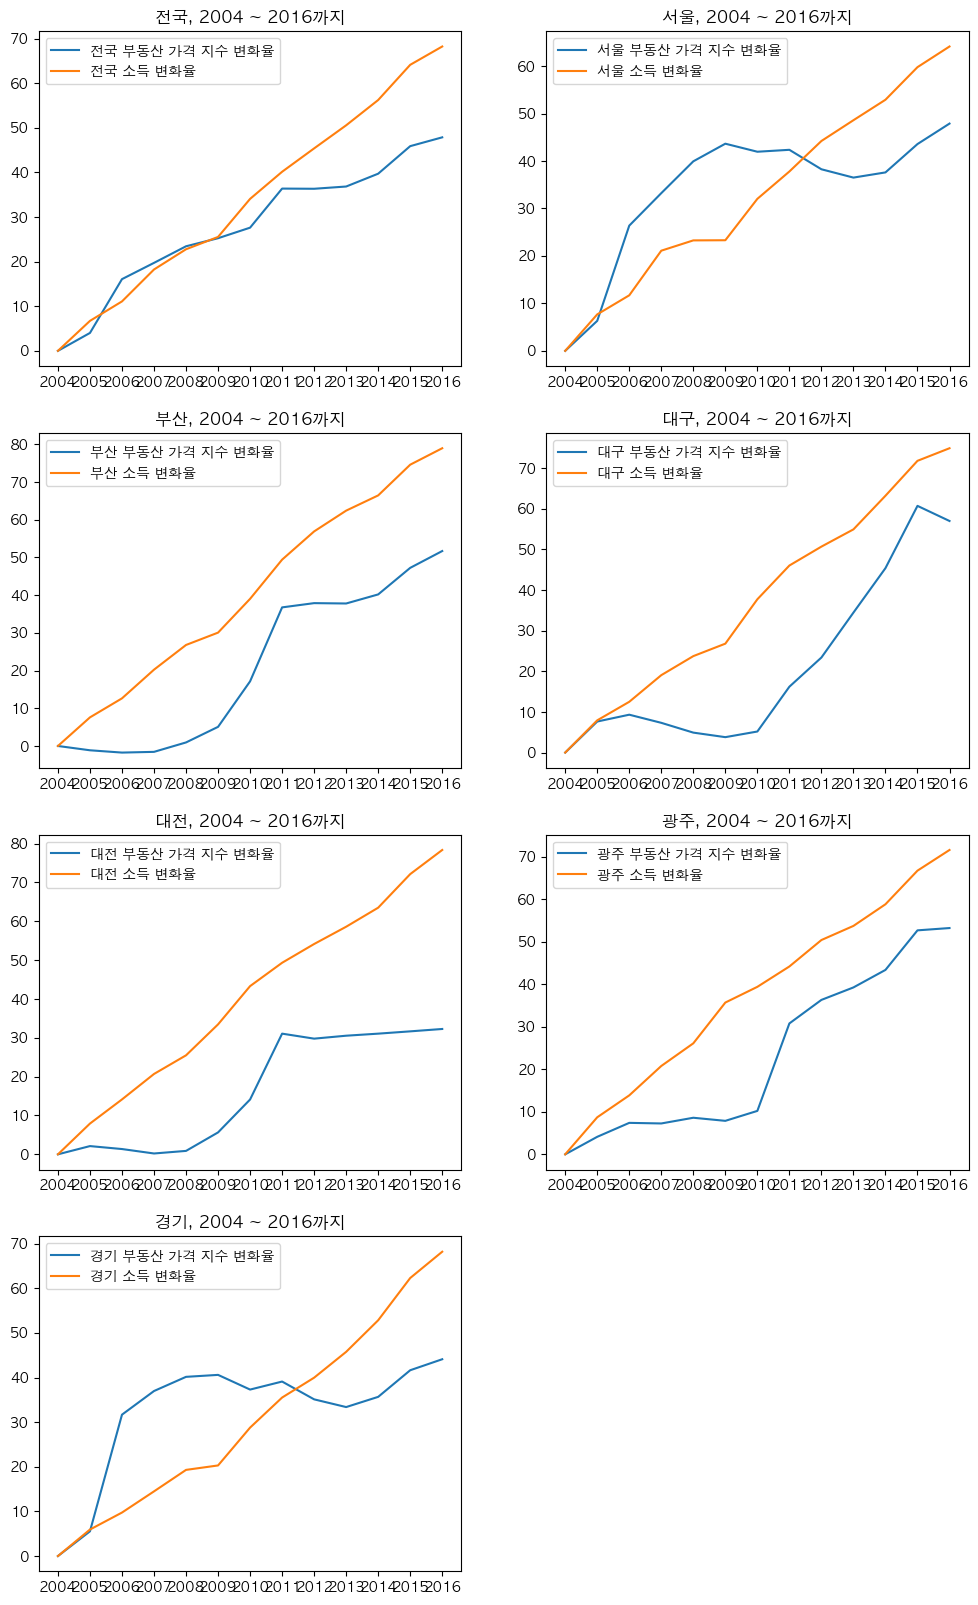

In [10]:
location_list = ['전국', '서울', '부산', '대구', '대전' ,'광주', '경기']
start_year = '2004'
end_year = '2016'

num_row = int((len(location_list)-1)/2)+1
plt.figure(figsize=(12, num_row*5))
for j, location in enumerate(location_list):
    year_data = []
    for i in range(int(start_year), int(end_year) + 1):
        if location == '제주도':
            year_data.append(price_data[location]['서귀포'][str(i)+'.12.1'])
        else:
            year_data.append(price_data[location][location][str(i)+'.12.1'])

    temp_df = pd.DataFrame(income_data[location][start_year:end_year])
    temp_df.columns = [location + '소득']
    temp_df[location + '부동산 가격지수'] = year_data
    temp_df['소득 변화율'] = (temp_df[location + '소득']/temp_df[location + '소득'][0] - 1 )*100
    temp_df['부동산 기격 지수 변화율'] = (temp_df[location + '부동산 가격지수']/temp_df[location + '부동산 가격지수'][0] - 1 )*100

    plt.subplot(num_row, 2, j+1)
    plt.title(location + ', ' + start_year + ' ~ ' + end_year + '까지')
    plt.plot(temp_df['부동산 기격 지수 변화율'], label=location + ' 부동산 가격 지수 변화율')
    plt.plot(temp_df['소득 변화율'], label=location + ' 소득 변화율')
    plt.legend()

In [11]:
# PIR데이터가져오기 가구 연소득별 데이터
path = r'/Users/parkjunhyeok/Desktop/부동산데이터분석/★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
wb = xw.Book(path)                
sheet = wb.sheets['PIR(월별)']   
row_num = sheet.range('J2').end('down').row  
data_range = 'B2:N' + str(row_num)
pir_rawdata = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 

In [12]:
pir_rawdata

,None,None,None,전국 All cities,None,None,None,None,서울 Seoul,None,None,None,None
0,None,None,None,가구 연소득 Household Income,None,None,None,None,가구 연소득 Household Income,None,None,None,None
1,None,None,None,1분위,2분위,3분위,4분위,5분위,1분위,2분위,3분위,4분위,5분위
2,'08.12\n,평균\n주택가격\nMean Housing Price,1분위,5.441946,2.645645,1.858094,1.386281,0.837666,16.73683,8.30789,5.856874,4.382019,2.65692
3,None,None,2분위,9.771072,4.750284,3.336228,2.489082,1.504038,25.967568,12.889878,9.087072,6.798801,4.122272
4,None,None,3분위,15.371844,7.473143,5.248552,3.915823,2.366151,33.968421,16.861371,11.886884,8.893576,5.392382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,9.0,평균\n주택가격\nMean Housing Price,1분위,7.486701,3.469953,2.378366,1.733279,1.013204,19.002977,8.835991,6.078142,4.424658,2.571079
588,None,None,2분위,12.567928,5.825012,3.992564,2.909656,1.700866,31.15124,14.484682,9.96379,7.253263,4.214724
589,None,None,3분위,17.462065,8.093358,5.547328,4.042718,2.363209,41.793505,19.433116,13.367741,9.731211,5.65461
590,None,None,4분위,25.125387,11.645172,7.981802,5.816887,3.400315,58.406583,27.157853,18.68147,13.599404,7.902339


In [13]:
# 지역을 구분한는 상위 컬럼 만들기 (전국,서울)
big_col = list(pir_rawdata.columns)
big_col[0] = 'index1'
big_col[1] = 'index2'
big_col[2] = 'index3'

for num, col in enumerate(big_col):
    if col == None:
        big_col[num] = big_col[num - 1]
    else:
        pass
# 상위컬럼

In [14]:
big_col

['index1',
 'index2',
 'index3',
 '전국 All cities',
 '전국 All cities',
 '전국 All cities',
 '전국 All cities',
 '전국 All cities',
 '서울 Seoul',
 '서울 Seoul',
 '서울 Seoul',
 '서울 Seoul',
 '서울 Seoul']

In [15]:
small_col = list(pir_rawdata.loc[1])
small_col[0] = 'index1'
small_col[1] = 'index2'
small_col[2] = 'index3'
# 하위컬럼


In [16]:
pir_rawdata.columns = [big_col,small_col]
# 이중컬럼설정

In [17]:
pir_rawdata.head()

index1                        index2 index3            전국 All cities  \
     index1                        index2 index3                      1분위   
0      None                          None   None  가구 연소득 Household Income   
1      None                          None   None                      1분위   
2  '08.12\n  평균\n주택가격\nMean Housing Price    1분위                 5.441946   
3      None                          None    2분위                 9.771072   
4      None                          None    3분위                15.371844   

                                                          서울 Seoul             \
        2분위       3분위       4분위       5분위                      1분위        2분위   
0      None      None      None      None  가구 연소득 Household Income       None   
1       2분위       3분위       4분위       5분위                      1분위        2분위   
2  2.645645  1.858094  1.386281  0.837666                 16.73683    8.30789   
3  4.750284  3.336228  2.489082  1.504038                25.967568  12.889878   
4  7.473143  5.248552  3.915823  2.366151                33.968421  16.861371   

                                  
         3분위       4분위       5분위  
0       None      None      None  
1        3분위       4분위       5분위  
2   5.856874  4.382019   2.65692  
3   9.087072  6.798801  4.122272  
4  11.886884  8.893576  5.392382

In [18]:
pir_rawdata.drop([0,1], inplace=True)

In [19]:
big_index = list(pir_rawdata['index1']['index1'])
for num, index in enumerate(big_index):
    if index is not None:
        if type(index) == str:
            big_index[num] = '20' + index.split(".")[0][1:] + '.' + index.split(".")[1][:2]
        else:
            big_index[num] = big_index[num - 1].split(".")[0] + "." +  str(int(index))
    else:
        big_index[num] = big_index[num - 1]

# 상위 인덱스 설정


In [20]:
small_index = list(pir_rawdata['index3']['index3'])
pir_rawdata.index = [pd.to_datetime(big_index), small_index]

del pir_rawdata['index1']
del pir_rawdata['index2']
del pir_rawdata['index3']

pir_rawdata.index.names = ['날짜', '평균주택가격']
# 하위 인덱스 설정

/var/folders/j6/q47by8d57xv9mxr1cgqzpp_w0000gn/T/ipykernel_30501/799667982.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pir_rawdata.index = [pd.to_datetime(big_index), small_index]


In [21]:
# xs = 하위분류반환
pir_rawdata.xs('3분위', level='평균주택가격')

전국 All cities                                           서울 Seoul  \
                     1분위       2분위       3분위       4분위       5분위        1분위   
날짜                                                                            
2008-12-01     15.371844  7.473143  5.248552  3.915823  2.366151  33.968421   
2009-01-01       16.1499  7.475327  5.167887  3.769598   2.18144  36.696595   
2009-02-01     16.019821  7.415118  5.126262  3.739236   2.16387   36.72688   
2009-03-01     15.954978  7.385104  5.105513  3.724101  2.155111  36.549641   
2009-04-01     15.393399  7.256726  5.141413  3.863399  2.414333   35.80001   
...                  ...       ...       ...       ...       ...        ...   
2018-05-01     17.241454  8.157808  5.794505  4.195956  2.500684  37.413006   
2018-06-01     17.233155  8.153881  5.791716  4.193937  2.499481  37.564071   
2018-07-01     17.317376  8.026297  5.501363  4.009221  2.343627   38.79512   
2018-08-01     17.321513  8.028215  5.502677  4.010179  2.344187  39.874755   
2018-09-01     17.462065  8.093358  5.547328  4.042718  2.363209  41.793505   

                                                      
                  2분위        3분위       4분위       5분위  
날짜                                                    
2008-12-01  16.861371  11.886884  8.893576  5.392382  
2009-01-01  17.181597  11.838926  8.637301  4.975489  
2009-02-01  17.195777  11.848696  8.644429  4.979596  
2009-03-01  17.112793  11.791516  8.602712  4.955565  
2009-04-01  16.966925   11.99662  9.019494  5.624337  
...               ...        ...       ...       ...  
2018-05-01  17.899497  12.780376  9.262446  5.484901  
2018-06-01  17.971771   12.83198  9.299846  5.507048  
2018-07-01  18.038929  12.408702  9.033066  5.248932  
2018-08-01  18.540937  12.754025  9.284449  5.395005  
2018-09-01  19.433116  13.367741  9.731211   5.65461  

[118 rows x 10 columns]

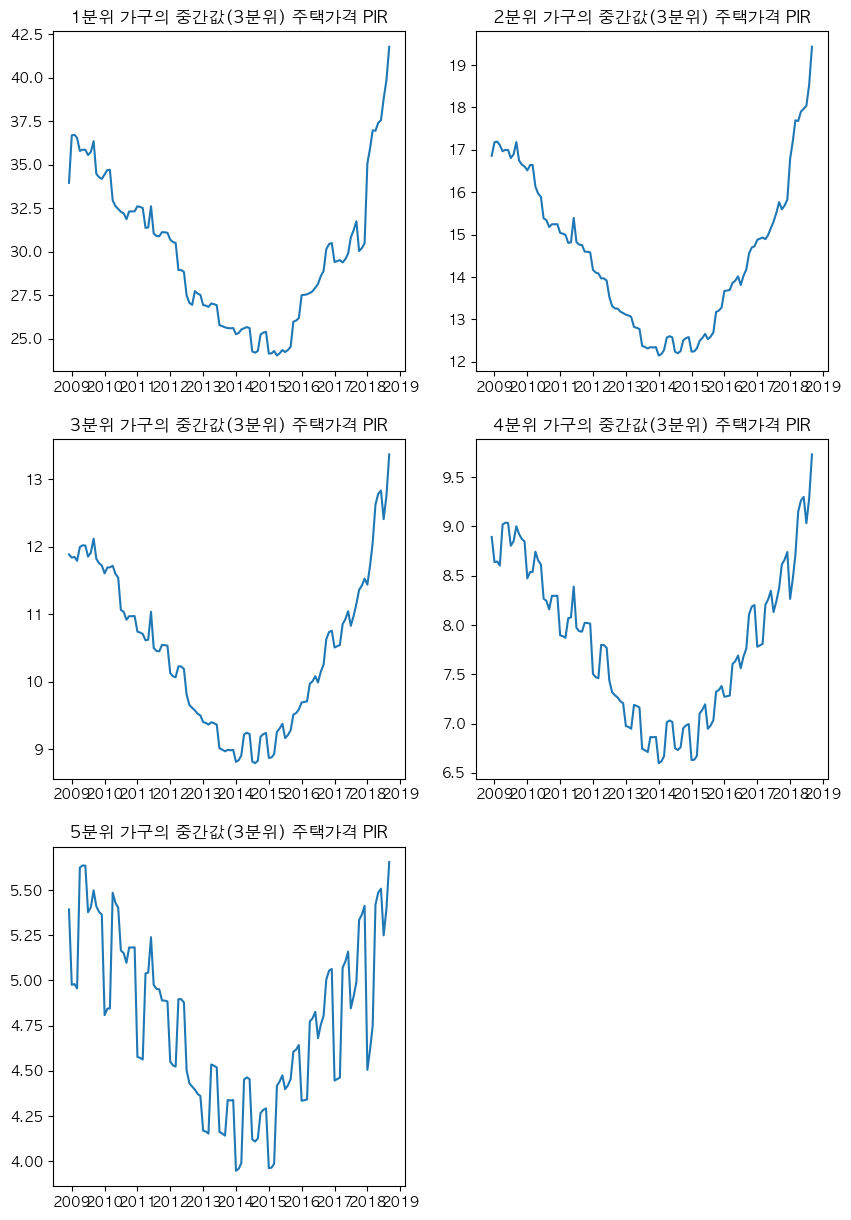

In [22]:
# PIR 데이터 시각화 (서울에서 각 소득 분위의 3분위 주택가격)
gagus = ['1분위', '2분위', '3분위', '4분위', '5분위']
location = '서울 Seoul'
num_row = int((len(gagus)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, gagu in enumerate(gagus):
    plt.subplot(num_row, 2, i+1)
    plt.title(gagu + " 가구의 중간값(3분위) 주택가격 PIR")
    plt.plot(pir_rawdata.xs('3분위', level='평균주택가격')[location][gagu])
    
plt.show()

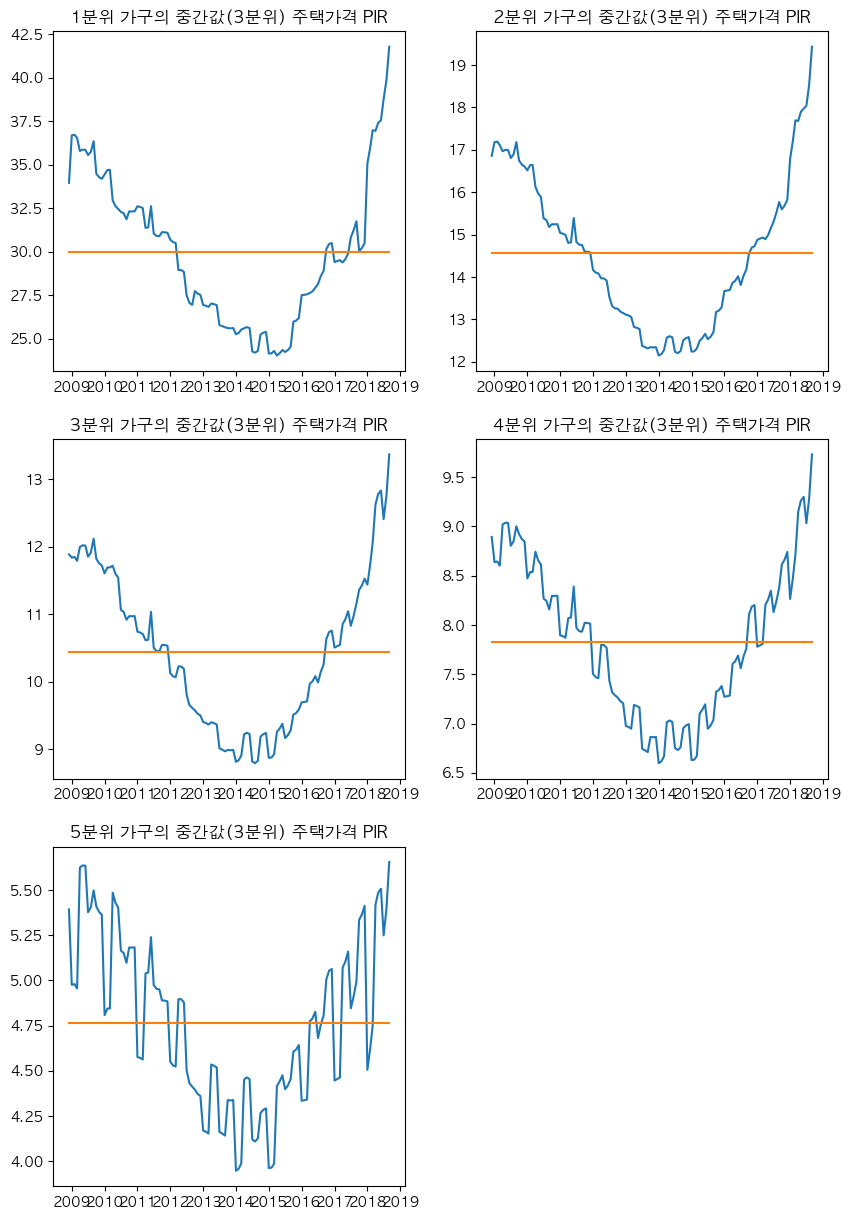

In [23]:
# PIR 그래프에 평균값 추가하기 
gagus = ['1분위', '2분위', '3분위', '4분위', '5분위']
location = '서울 Seoul'
house_price_level = '3분위'
num_row = int((len(gagus)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, gagu in enumerate(gagus):
    plt.subplot(num_row, 2, i+1)
    plt.title(gagu + " 가구의 중간값(" + house_price_level + ") 주택가격 PIR")
    plt.plot(pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu])
    indx = pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu].index
    long_mean = pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu].mean() #평균값
    plt.plot(indx, [long_mean for a in range(len(pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu]))]) # 추가해서 넣기
    
plt.show()